- 시계열 데이터  : 시간축에 따라 신호가 변화는 동적 데이터

  순서가 중요한 데이터
  - 고전적인 모델
    - ARIMA(autoregressive integrated moving average)
    - SARIMA(seasonal ARIMA)
  - 딥러닝 모델
    - RNN
    - LSTM(long short-term memory) ; 선별 기억능력을 갖춰 장기 문맥에 유리
  - 샘플의 길이가 다름 : 발음
  - 문맥 의존성
  - 계절성
    - 상추판매량, 미세먼지 수치, 항공권 판매량
  - 데이터 x = (x1,x2,x3)...  가변길이고 벡터임
    - 매일 기온이나 습도  a = (23.5,23.4,..) b = (10,15,20..)
  - 적용
    - 미래 예측(주가,날씨, 기계고장(예지보전) )    
    - 언어번역
    - 음성인식
    - 생성모델(사진을 보고 문장을 생성)

    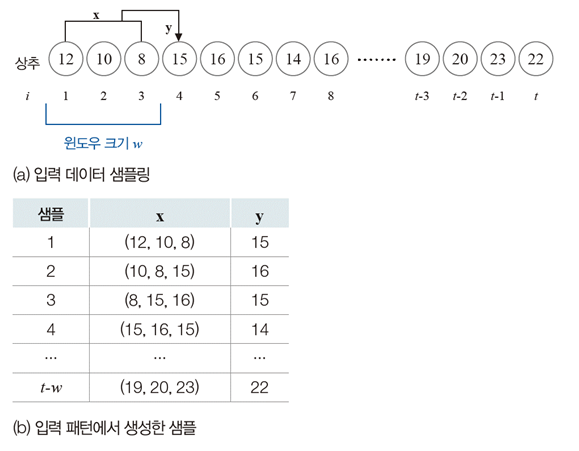

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# 종가만 선택
df = pd.read_csv('BTC.csv')
seq = df.loc[:,'Closing Price (USD)'].to_numpy()
print(len(seq) )

365


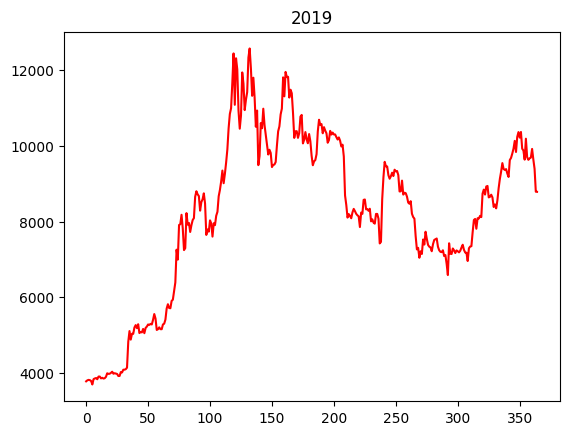

In [3]:
import matplotlib.pyplot as plt
plt.plot(seq,color='red')
plt.title('2019')
plt.show()

In [4]:
# 하이퍼 파라메터
window_size = 2
def makeSequencData(seq, window_size):
    x,y = [],[]
    for i in range(len(seq) - window_size):
        x.append(seq[i:(i+window_size)])
        y.append(seq[i+window_size])
    return np.array(x), np.array(y)

In [5]:
seq[:5]

array([3772.93633533, 3799.67854295, 3811.61197937, 3804.41917011,
       3782.66410112])

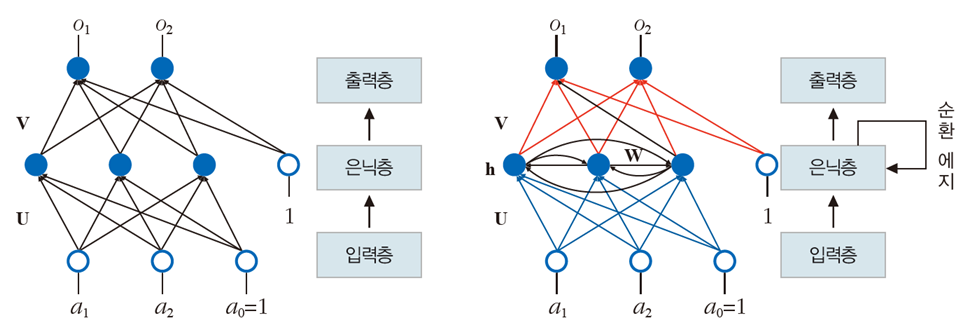

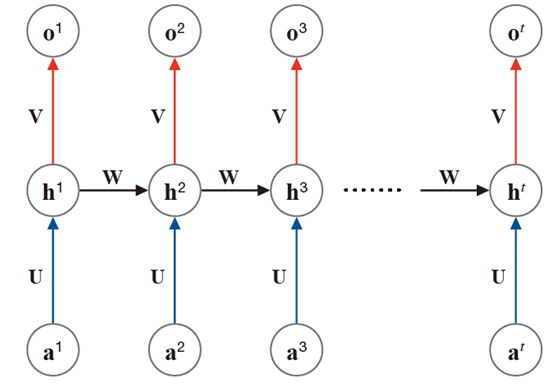

LSTM
  -게이트라는 개념으로 선별 기억능력 확보
  - 0는 열림, X는 닫힘  

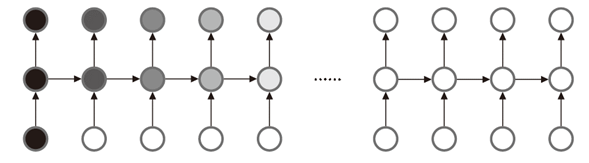

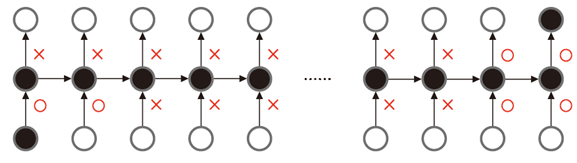

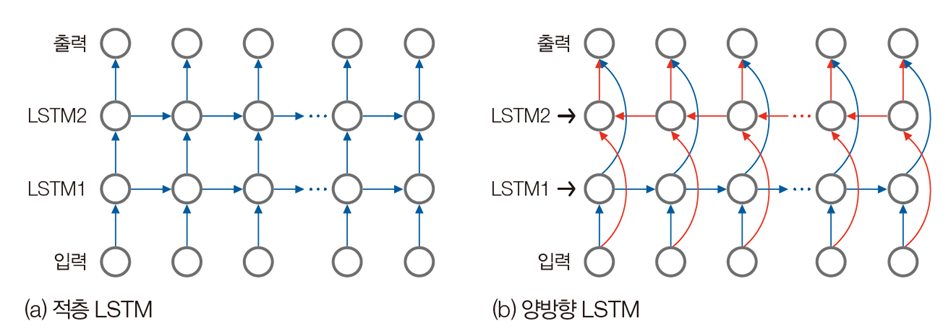

양방향은 문맥의 앞뒤를 고려한다.

나는 학교를 하려고 차를 ....

이번에 산차는 맛이 좋다......

영어로 번역할때 차..... CAR, TEA

- 단일 채널 : 종가
- 다중 채널 : 전부....

7일치 : window size

In [6]:
# 종가만 선택
df = pd.read_csv('BTC.csv')
seq = df.loc[:,'Closing Price (USD)'].to_numpy()

# 하이퍼 파라메터
window_size = 7
def makeSequencData(seq, window_size):
    x,y = [],[]
    for i in range(len(seq) - window_size):
        x.append(seq[i:(i+window_size)])
        y.append(seq[i+window_size])
    return np.array(x), np.array(y)

x,y = makeSequencData(seq,window_size)

In [7]:
split_size = int(len(x)*0.7)
x_train = x[:split_size]; x_test = x[split_size:]
y_train = y[:split_size]; y_test = y[split_size:]
x_train.shape
x_train_reshape = x_train.reshape(-1,7,1)
x_test_reshape = x_test.reshape(-1,7,1)

모델 설계

In [ ]:
inputs = tf.keras.Input(shape = x_train_reshape.shape[1:])
x = tf.keras.layers.LSTM(128,activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist = model.fit(x_train_reshape,y_train,epochs=200,batch_size=1,validation_data=(x_test_reshape,y_test))


In [10]:
# LSTM 모델 평가
model.evaluate(x_test_reshape,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 166.7521 - mae: 166.7521


[166.75205993652344, 166.75205993652344]

In [13]:
# 평균 절대값백분율 오차
pred = model.predict(x_test_reshape)
sum(abs(y_test-pred)/y_test)/ len(x_test)


4/4 [==============================] - 0s 3ms/step


array([0.11466963, 0.11433728, 0.1120817 , 0.11047783, 0.11036661,
       0.11076276, 0.11140749, 0.11219242, 0.11277909, 0.12656331,
       0.14656441, 0.14304332, 0.17504088, 0.15146881, 0.16018592,
       0.13026255, 0.13730123, 0.12241618, 0.12947754, 0.13776481,
       0.14082674, 0.14211815, 0.15127342, 0.13681991, 0.13080155,
       0.12989998, 0.12914398, 0.14085022, 0.14865323, 0.15298233,
       0.15388548, 0.14873964, 0.16804292, 0.16422063, 0.20093161,
       0.25469887, 0.13541102, 0.15928508, 0.160344  , 0.14443218,
       0.14892339, 0.15682182, 0.14905576, 0.15136875, 0.15466313,
       0.14988575, 0.14240873, 0.13756778, 0.14755807, 0.15511129,
       0.15574951, 0.18890669, 0.14402528, 0.14053387, 0.13987062,
       0.12291954, 0.11339765, 0.11289686, 0.11987593, 0.11257437,
       0.11271164, 0.11190814, 0.11220657, 0.11391585, 0.11729684,
       0.11327555, 0.12026501, 0.12082335, 0.11176156, 0.11200877,
       0.1132035 , 0.11170849, 0.11037793, 0.11032552, 0.11051

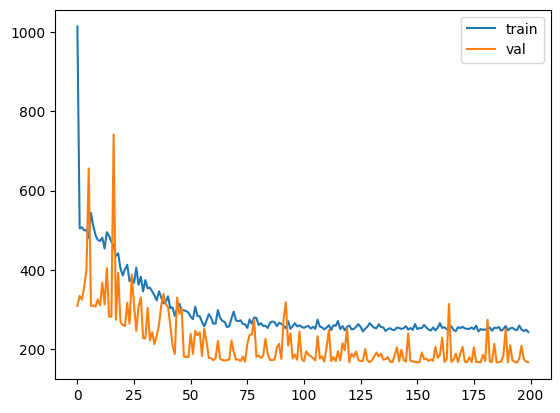

In [19]:
# 학습곡선
plt.plot(hist.history['mae'],label = 'train')
plt.plot(hist.history['val_mae'],label='val')
plt.legend()
plt.show()

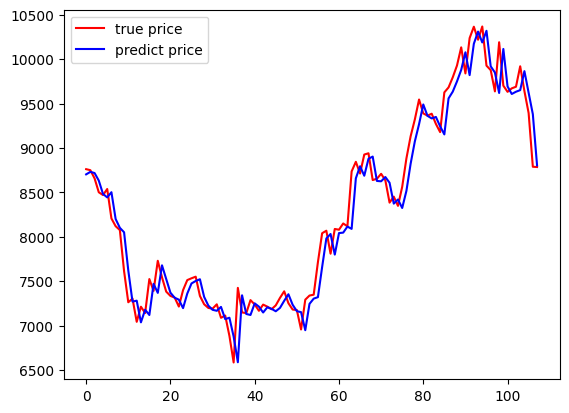

In [17]:
# 예측결과
x_range = range(len(x_test))
plt.plot(x_range,y_test[x_range],color='red',label='true price')
plt.plot(x_range,pred[x_range],color='blue', label = 'predict price')
plt.legend()
plt.show()

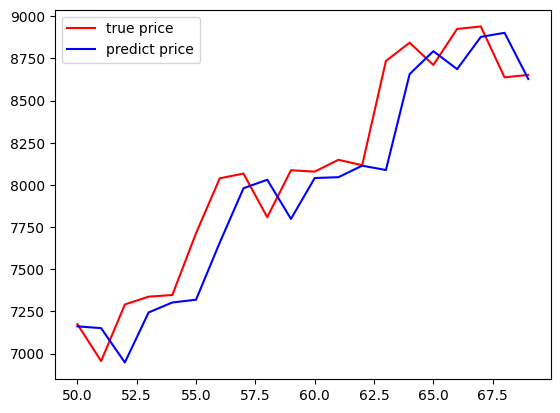

In [18]:
# 일부 구간을 확대해서 시각화
x_range = range(50,70)
plt.plot(x_range,y_test[x_range],color='red',label='true price')
plt.plot(x_range,pred[x_range],color='blue', label = 'predict price')
plt.legend()
plt.show()

성능평가
  - MAE  mean absolute error : 스케일 문제에 대처하지 못함
  - MAPE : 평균절대값 백분율 오차

  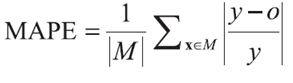

In [24]:
y_test = np.array([1,2,3,4,5,6,7,8,9,10])
pred = np.array([5,2,5,2,1,4,1,2,5,1])
sum(abs(y_test - pred)) / len(y_test)

3.9

In [26]:
sum(abs((y_test - pred) / y_test))/len(y_test)

0.9251587301587302

등락 정확률
  - 얼마나 맞추는지 측정
  - 맞힌 경우의 수를 전체 샘플로 나눔

다중채널을 이용한 예측

In [27]:
df = pd.read_csv('BTC.csv')
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048


In [39]:
seq = df.drop(columns=['Currency','Date']).to_numpy()
seq.shape

(365, 4)

In [35]:
window_size = 7
def makeSequencData(seq, window_size):
    x,y = [],[]
    for i in range(len(seq) - window_size):
        x.append(seq[i:(i+window_size)])
        y.append(seq[i+window_size])
    return np.array(x), np.array(y)
x,y = makeSequencData(seq,window_size)

In [44]:
x.shape, y.shape

((358, 7, 4), (358, 4))

In [45]:
split_size = int(len(x)*0.7)
x_train = x[:split_size]; x_test = x[split_size:]
y_train = y[:split_size]; y_test = y[split_size:]
x_train.shape

(250, 7, 4)

In [50]:
inputs = tf.keras.Input(shape = x_train.shape[1:])
x = tf.keras.layers.LSTM(128,activation='relu')(inputs)
outputs = tf.keras.layers.Dense(4)(x)  # 채널정보가 4개이므로 최종 출력도 4개
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist = model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=0)

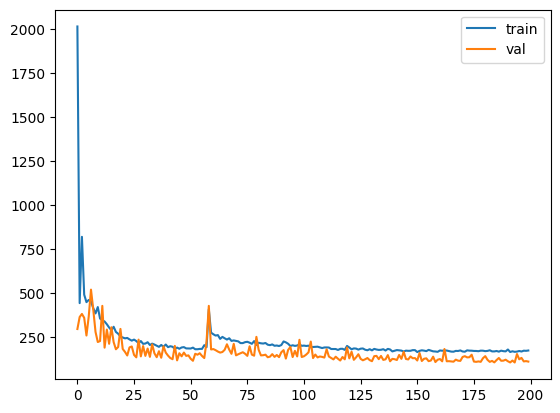

In [51]:
# 학습곡선
plt.plot(hist.history['mae'],label = 'train')
plt.plot(hist.history['val_mae'],label='val')
plt.legend()
plt.show()

In [52]:
# 평균 절대값백분율 오차
pred = model.predict(x_test)
sum(abs(y_test-pred)/y_test)/ len(x_test)

4/4 [==============================] - 0s 3ms/step


array([0.01981554, 0.0039309 , 0.0147968 , 0.01604349])

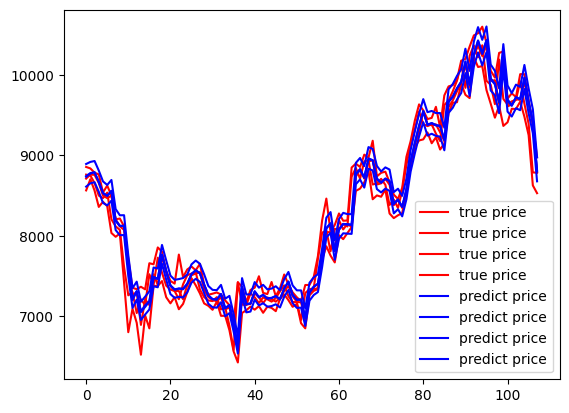

In [53]:
# 예측결과
x_range = range(len(x_test))
plt.plot(x_range,y_test[x_range],color='red',label='true price')
plt.plot(x_range,pred[x_range],color='blue', label = 'predict price')
plt.legend()
plt.show()

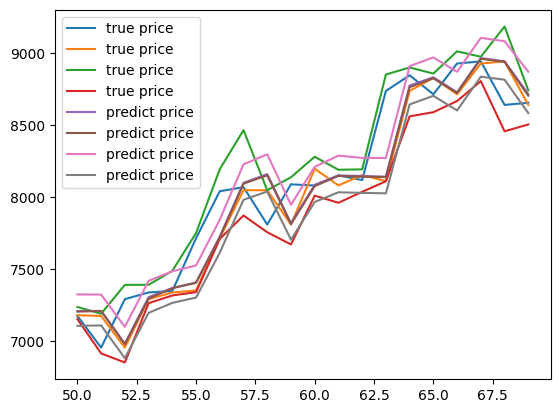

In [55]:
# 일부 구간을 확대해서 시각화
x_range = range(50,70)
plt.plot(x_range,y_test[x_range],label='true price')
plt.plot(x_range,pred[x_range], label = 'predict price')
plt.legend()
plt.show()

In [ ]:
# https://dacon.io/competitions/official/235740/overview/description